In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [5]:
df.shape

(1338, 7)

In [6]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder             #importing labelencoder to create labelencoder


In [8]:
le = LabelEncoder()                       #creating an object to convert string to numeric data


In [10]:
# fit_transform
df.iloc[:,1] = le.fit_transform(df.iloc[:,1])         # accessing sex column
df.iloc[:,4] = le.fit_transform(df.iloc[:,4])         # accessing smoker columnn
df.iloc[:,5] = le.fit_transform(df.iloc[:,5])         # accessing region column
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [11]:
df['region'].unique()

array([3, 2, 1, 0])

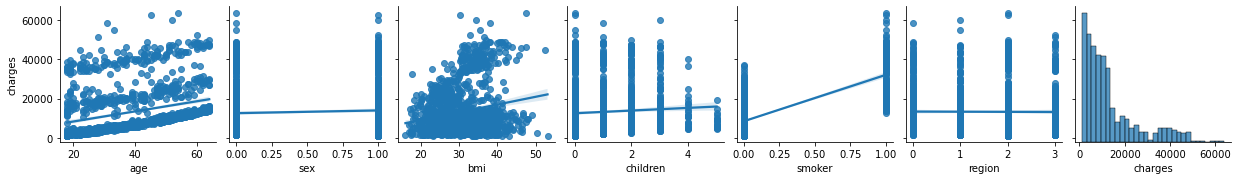

In [12]:
import seaborn as sns
sns.pairplot(df,y_vars = "charges",kind = 'reg')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
# x - independent variable
# y - target variable
x = df.iloc[:,:6]
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [18]:
y = df.iloc[:,-1]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
print(x_train.shape)
print(x_test.shape)

(1003, 6)
(335, 6)


## Modelling


In [21]:
lin = LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [23]:
pred = lin.predict(x_test)
pred

array([ 4126.01326061,  2241.43884989, 12214.7412033 ,  3817.85704126,
        8346.7675038 , 14913.93501312, 11283.30168489,  6849.38886325,
       13759.67382031, 25834.40056142,  5835.94584272, 34162.62844852,
       14005.38248545, 14136.8394661 , 29457.9197978 , 27486.18073617,
        7063.03365905,  5040.82365865, 37937.01490548, 16687.3300415 ,
       11103.63028053, 27270.37797637, 14198.10713514, 10618.53957352,
       32433.75490343, 18493.36198378, 14189.50855152, 12625.77801664,
        5735.95971913, 10512.80513384, 11164.28239446, 11448.20816204,
        5348.79751691,  5349.71652998, 10991.29812895, 12548.00981465,
       23685.43366888,  6452.82477236,  8238.99842792, 11702.64123353,
         844.84290492,  8134.49335822, 35631.06848208,  2509.04449665,
       14538.49378301,  2597.39465979,  2049.98986966, 36471.56648075,
        3261.14155635,  4294.0499886 , 11677.43995619,  4117.77235783,
       13513.07800853,  8491.22507297, 17698.73550333,  3569.49566983,
      

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.733938932913082